# Section 2

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "serif",
    "font.size": 16
})

$$
G(\tau) = -\frac{1}{2}\left(
    \frac{e^{- \tau U/2}}{1+e^{-\beta U/2}} + \frac{e^{\tau U/2}}{1+e^{-\beta U/2}}
\right)
$$

''

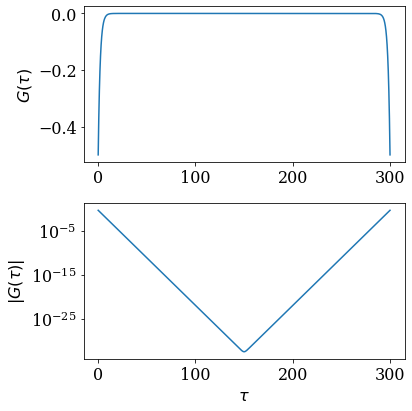

In [2]:
fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
axes = [ax1, ax2]

beta = 300.0
U = 1.0
ntau = 1000

taus = np.linspace(0.0, beta, ntau)

gtau_single_pole = lambda tau, epsilon: -np.exp(-tau*epsilon)/(1+np.exp(-beta*epsilon))
gtau = lambda taus: 0.5*(gtau_single_pole(taus, 0.5*U) + gtau_single_pole(taus, -0.5*U))

gtaus = gtau(taus)
ax1.plot(taus, gtaus)
ax2.semilogy(taus, np.abs(gtaus))
#ax2.plot(xs, xs**2)
#ax3.plot(xs, xs**3)

#ax1.legend(frameon=False)

ax1.set_ylabel(r'$G(\tau)$')
ax2.set_ylabel(r'$|G(\tau)|$')
ax2.set_xlabel(r'$\tau$')
plt.tight_layout()
plt.savefig('gtau_hubbard_atom.pdf', transparent=True)
;

In [3]:
giv = lambda v: 0.5*( 1/(1J*v*np.pi/beta - 0.5*U) + 1/(1J*v*np.pi/beta + 0.5*U) )

Text(0, 0.5, '$\\mathrm{Re}~G(\\mathrm{i}\\nu)$')

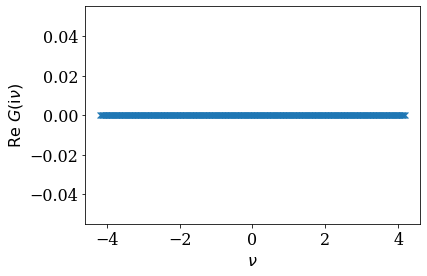

In [4]:
vs = 2*np.arange(-200, 200)+1
givs = giv(vs)
plt.plot(vs * np.pi/beta, givs.real, marker='x', ls='')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\mathrm{Re}~G(\mathrm{i}\nu)$')

''

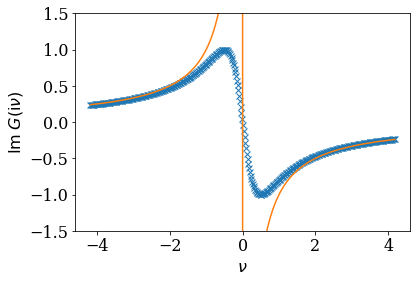

In [5]:
x = vs * np.pi/beta
plt.plot(x, givs.imag, marker='x', ls='')
plt.plot(x, -1/x, marker='', ls='-')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\mathrm{Im}~G(\mathrm{i}\nu)$')
plt.ylim([-1.5, 1.5])
plt.savefig('giv_hubbard_atom.pdf', transparent=True)
;

In [6]:
gtau_trunc = lambda tau: (1/beta) * np.sum(givs * np.exp(-1J*tau*vs*np.pi/beta))

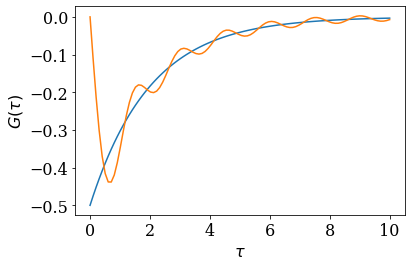

In [7]:
taus_near_zero = np.linspace(0, 10/U, 100)
plt.plot(taus_near_zero, gtau(taus_near_zero).real)
plt.plot(taus_near_zero, [gtau_trunc(t).real for t in taus_near_zero])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$G(\tau)$')
plt.tight_layout()
plt.savefig("naive_inverse_transform_hubbard_atom.pdf", transparent=True)